In [1]:
from __future__ import division
from importlib import reload
from modules import * 

import csv
import pickle
fig_savedir = '../data/figures/'

(7, 13)


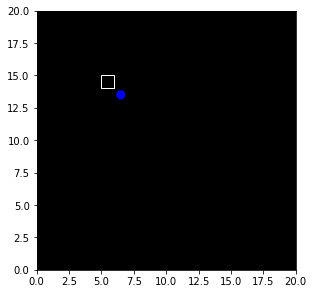

In [2]:
grid_params = {
    'y_height':     20, 
    'x_width':      20,
    'walls':        False,
    'rho':          0,
    'maze_type':    'none',
    'port_shift':   'none' 
}

#make environment
maze = eu.gridworld(grid_params)

gp.plot_env(maze)

In [3]:
def reset_agt():
    agent_params = {
        'load_model':   False,
        'load_dir':     '../data/outputs/gridworld/open_field{}{}.pt'.format(grid_params['x_width'],grid_params['y_height']),
        'rwd_placement':'training_loc',
        'action_dims':  len(maze.actionlist),
        'lin_dims':     500,
        'batch_size':   1,
        'gamma':        0.98, #discount factor
        'eta':          5e-4,
        'temperature':  1,
        'use_EC':       False,
        'cachelim':     100, # memory limit should be ~75% of #actions x #states
        'state_type':   'conv'
    }

    ## some stupid reward placement shit -- replace later
    if agent_params['load_model'] == True:
        if agent_params['rwd_placement'] == 'training_loc':
            maze.set_rwd([(int(grid_params['y_height']/2),int(grid_params['x_width']/2))])
        if agent_params['rwd_placement'] == 'moved_loc':
            maze.set_rwd([(int(grid_params['y_height']/4),int(3*grid_params['x_width']/4))])
    else:
        maze.set_rwd([(int(grid_params['y_height']/2),int(grid_params['x_width']/2))])

    # make agent 
    agent_params = sg.gen_input(maze, agent_params)
    MF,opt = ac.make_agent(agent_params, freeze=False)

    if agent_params['use_EC']:
        agent_params['cachelim'] = int(0.5*np.prod(maze.grid.shape))
        agent_params['EC'] = ec.ep_mem(MF,agent_params['cachelim'])

    run_dict = {
        'NUM_EVENTS':   300,
        'NUM_TRIALS':   2000,
        'environment':  maze,
        'agent':        MF,
        'optimizer':    opt,
        'agt_param':    agent_params
    }
    
    return run_dict

In [4]:
full = [[],[]]
short= [[],[]]
penalties = [0, -0.01]

In [5]:
for i in range(20):
    print('experiment #', i)
    for ind, j in enumerate(penalties):
        run_dict = reset_agt()
        expt.run_full_trials(run_dict,pen=j)
        full[ind].append(run_dict['total_reward'])
        
        run_dict = reset_agt()
        run_dict['NUM_EVENTS'] = 500
        expt.run_truncated_trials(run_dict, pen=j)
        short[ind].append(run_dict['total_reward'])

experiment # 0
[01:22:12]  Trial 1 TotRew = 0 (0.371s)
[01:22:49]  Trial 101 TotRew = 0 (37.514s)
[01:23:27]  Trial 201 TotRew = 107 (37.903s)
[01:24:05]  Trial 301 TotRew = 0 (38.003s)
[01:24:44]  Trial 401 TotRew = 196 (38.482s)
[01:25:22]  Trial 501 TotRew = 297 (38.212s)
[01:26:00]  Trial 601 TotRew = 290 (38.307s)
[01:26:39]  Trial 701 TotRew = 291 (38.622s)
[01:27:18]  Trial 801 TotRew = 288 (39.774s)
[01:27:58]  Trial 901 TotRew = 0 (39.775s)
[01:28:38]  Trial 1001 TotRew = 280 (39.655s)
[01:29:18]  Trial 1101 TotRew = 292 (39.695s)
[01:29:57]  Trial 1201 TotRew = 150 (39.667s)
[01:30:37]  Trial 1301 TotRew = 285 (39.915s)
[01:31:17]  Trial 1401 TotRew = 296 (39.732s)
[01:31:56]  Trial 1501 TotRew = 295 (39.502s)
[01:32:36]  Trial 1601 TotRew = 289 (39.600s)
[01:33:16]  Trial 1701 TotRew = 296 (39.987s)
[01:33:56]  Trial 1801 TotRew = 289 (39.551s)
[01:34:35]  Trial 1901 TotRew = 294 (39.641s)
[01:35:15]  Trial 2000 TotRew = 296 (39.556s)
[01:35:15]  Trial 1 TotRew = 0 (0.661s)


[03:04:51]  Trial 101 TotRew = 3 (38.689s)
[03:05:29]  Trial 201 TotRew = 18 (38.406s)
[03:06:07]  Trial 301 TotRew = 0 (38.205s)
[03:06:46]  Trial 401 TotRew = 0 (38.223s)
[03:07:24]  Trial 501 TotRew = 0 (38.189s)
[03:08:02]  Trial 601 TotRew = 300 (38.239s)
[03:08:41]  Trial 701 TotRew = 275 (38.975s)
[03:09:20]  Trial 801 TotRew = 297 (39.503s)
[03:10:00]  Trial 901 TotRew = 273 (39.098s)
[03:10:39]  Trial 1001 TotRew = 299 (39.379s)
[03:11:18]  Trial 1101 TotRew = 292 (39.255s)
[03:11:58]  Trial 1201 TotRew = 297 (39.437s)
[03:12:37]  Trial 1301 TotRew = 298 (39.579s)
[03:13:17]  Trial 1401 TotRew = 292 (40.203s)
[03:13:57]  Trial 1501 TotRew = 297 (39.449s)
[03:14:37]  Trial 1601 TotRew = 289 (39.712s)
[03:15:16]  Trial 1701 TotRew = 297 (39.733s)
[03:15:56]  Trial 1801 TotRew = 295 (39.621s)
[03:16:35]  Trial 1901 TotRew = 295 (39.541s)
[03:17:15]  Trial 2000 TotRew = 294 (39.474s)
[03:17:16]  Trial 1 TotRew = 0 (0.668s)
[03:18:12]  Trial 101 TotRew = 0 (56.455s)
[03:18:57]  Tri

[04:47:54]  Trial 501 TotRew = 0 (41.958s)
[04:48:36]  Trial 601 TotRew = 0 (41.629s)
[04:49:18]  Trial 701 TotRew = 293 (42.549s)
[04:50:02]  Trial 801 TotRew = 295 (43.485s)
[04:50:45]  Trial 901 TotRew = 294 (43.637s)
[04:51:29]  Trial 1001 TotRew = 0 (43.724s)
[04:52:13]  Trial 1101 TotRew = 297 (43.609s)
[04:52:56]  Trial 1201 TotRew = 300 (43.614s)
[04:53:40]  Trial 1301 TotRew = 270 (43.439s)
[04:54:23]  Trial 1401 TotRew = 276 (43.700s)
[04:55:07]  Trial 1501 TotRew = 281 (43.763s)
[04:55:51]  Trial 1601 TotRew = 0 (43.593s)
[04:56:34]  Trial 1701 TotRew = 296 (43.471s)
[04:57:18]  Trial 1801 TotRew = 297 (43.449s)
[04:58:01]  Trial 1901 TotRew = 293 (43.612s)
[04:58:44]  Trial 2000 TotRew = 294 (43.198s)
[04:58:45]  Trial 1 TotRew = 1 (0.088s)
[04:59:34]  Trial 101 TotRew = 0 (49.925s)
[05:00:15]  Trial 201 TotRew = 1 (40.695s)
[05:01:02]  Trial 301 TotRew = 0 (46.832s)
[05:01:55]  Trial 401 TotRew = 0 (52.561s)
[05:02:45]  Trial 501 TotRew = 1 (50.661s)
[05:03:39]  Trial 601 

[06:26:51]  Trial 401 TotRew = 300 (42.858s)
[06:27:34]  Trial 501 TotRew = 0 (42.854s)
[06:28:17]  Trial 601 TotRew = 295 (42.832s)
[06:29:01]  Trial 701 TotRew = 300 (43.405s)
[06:29:45]  Trial 801 TotRew = 300 (44.002s)
[06:30:28]  Trial 901 TotRew = 260 (43.706s)
[06:31:12]  Trial 1001 TotRew = 293 (43.599s)
[06:31:55]  Trial 1101 TotRew = 274 (43.508s)
[06:32:39]  Trial 1201 TotRew = 297 (44.002s)
[06:33:23]  Trial 1301 TotRew = 292 (43.928s)
[06:34:07]  Trial 1401 TotRew = 296 (43.788s)
[06:34:52]  Trial 1501 TotRew = 293 (44.429s)
[06:35:36]  Trial 1601 TotRew = 298 (44.313s)
[06:36:20]  Trial 1701 TotRew = 269 (44.287s)
[06:37:05]  Trial 1801 TotRew = 297 (44.557s)
[06:37:49]  Trial 1901 TotRew = 299 (44.403s)
[06:38:33]  Trial 2000 TotRew = 294 (43.830s)
[06:38:34]  Trial 1 TotRew = 0 (0.649s)
[06:39:29]  Trial 101 TotRew = 1 (55.881s)
[06:40:17]  Trial 201 TotRew = 0 (47.107s)
[06:40:59]  Trial 301 TotRew = 1 (42.785s)
[06:41:47]  Trial 401 TotRew = 1 (47.558s)
[06:42:38]  Tr

[08:04:30]  Trial 401 TotRew = 0 (41.474s)
[08:05:11]  Trial 501 TotRew = 0 (41.786s)
[08:05:53]  Trial 601 TotRew = 0 (41.609s)
[08:06:35]  Trial 701 TotRew = 0 (42.039s)
[08:07:19]  Trial 801 TotRew = 0 (43.880s)
[08:08:02]  Trial 901 TotRew = 0 (43.487s)
[08:08:46]  Trial 1001 TotRew = 0 (43.720s)
[08:09:29]  Trial 1101 TotRew = 0 (43.230s)
[08:10:13]  Trial 1201 TotRew = 0 (43.364s)
[08:10:56]  Trial 1301 TotRew = 0 (43.715s)
[08:11:40]  Trial 1401 TotRew = 0 (43.213s)
[08:12:23]  Trial 1501 TotRew = 0 (43.295s)
[08:13:06]  Trial 1601 TotRew = 0 (43.353s)
[08:13:50]  Trial 1701 TotRew = 0 (43.269s)
[08:14:33]  Trial 1801 TotRew = 0 (43.527s)
[08:15:17]  Trial 1901 TotRew = 0 (43.618s)
[08:16:00]  Trial 2000 TotRew = 0 (42.854s)
[08:16:00]  Trial 1 TotRew = 0 (0.656s)
[08:16:54]  Trial 101 TotRew = 0 (53.982s)
[08:17:38]  Trial 201 TotRew = 1 (43.655s)
[08:18:23]  Trial 301 TotRew = 1 (45.017s)
[08:19:11]  Trial 401 TotRew = 0 (47.935s)
[08:19:55]  Trial 501 TotRew = 0 (44.001s)
[08

[09:48:45]  Trial 901 TotRew = 297 (44.148s)
[09:49:29]  Trial 1001 TotRew = 291 (44.039s)
[09:50:13]  Trial 1101 TotRew = 267 (43.883s)
[09:50:57]  Trial 1201 TotRew = 294 (44.025s)
[09:51:41]  Trial 1301 TotRew = 300 (43.687s)
[09:52:24]  Trial 1401 TotRew = 284 (43.902s)
[09:53:09]  Trial 1501 TotRew = 295 (44.327s)
[09:53:53]  Trial 1601 TotRew = 281 (43.999s)
[09:54:37]  Trial 1701 TotRew = 298 (43.848s)
[09:55:21]  Trial 1801 TotRew = 292 (43.949s)
[09:56:04]  Trial 1901 TotRew = 294 (43.769s)
[09:56:48]  Trial 2000 TotRew = 294 (43.473s)
[09:56:48]  Trial 1 TotRew = 0 (0.662s)
[09:57:39]  Trial 101 TotRew = 0 (50.970s)
[09:58:21]  Trial 201 TotRew = 1 (41.322s)
[09:59:08]  Trial 301 TotRew = 0 (47.179s)
[09:59:53]  Trial 401 TotRew = 0 (45.382s)
[10:00:40]  Trial 501 TotRew = 0 (46.710s)
[10:01:30]  Trial 601 TotRew = 1 (50.102s)
[10:02:15]  Trial 701 TotRew = 0 (44.831s)
[10:02:59]  Trial 801 TotRew = 0 (43.603s)
[10:03:47]  Trial 901 TotRew = 0 (48.454s)
[10:04:34]  Trial 1001

KeyboardInterrupt: 

In [25]:
picklepickle = [full, short]
pickle.dump(picklepickle, open('miniexpt.p', 'wb'))

In [ ]:
===

In [12]:
f_ = np.asarray(full)
s_ = np.asarray(short)

In [23]:
smoothing = 20
full_non = gp.running_mean(np.mean(f_[0],axis=0), smoothing)
full_pen = gp.running_mean(np.mean(f_[1],axis=0), smoothing)

shrt_non = gp.running_mean(np.mean(s_[0],axis=0), smoothing)
shrt_pen = gp.running_mean(np.mean(s_[1],axis=0), smoothing)


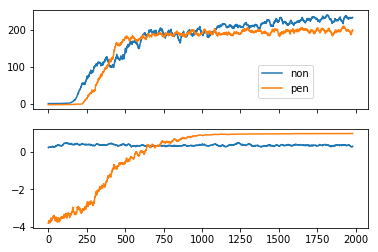

In [24]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(full_non, label='non')
ax[0].plot(full_pen, label='pen')

ax[1].plot(shrt_non)
ax[1].plot(shrt_pen)

ax[0].legend(bbox_to_anchor=(0.85, 0.5))

In [32]:
va, pa = ac.snapshot(maze,run_dict['agent'])

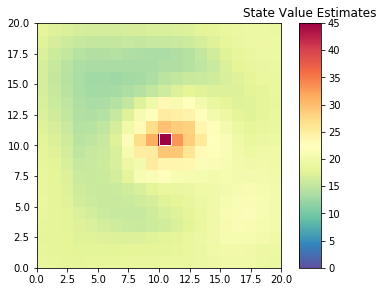

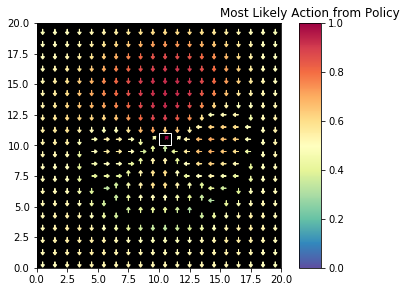

In [35]:
reload(gp)
gp.plot_valmap(maze,va)
gp.plot_polmap(maze,pa)

In [30]:
run_dict = reset_agt()
expt.run_full_trials(run_dict,pen=0)


[18:36:01]  Trial 1 TotRew = 0 (0.364s)
[18:36:50]  Trial 101 TotRew = 0 (49.718s)
[18:37:47]  Trial 201 TotRew = 0 (56.679s)
[18:38:52]  Trial 301 TotRew = 85 (65.154s)
[18:39:59]  Trial 401 TotRew = 0 (66.471s)
[18:40:44]  Trial 501 TotRew = 0 (45.629s)
[18:41:36]  Trial 601 TotRew = 296 (52.030s)
[18:42:30]  Trial 701 TotRew = 286 (53.950s)
[18:43:34]  Trial 801 TotRew = 300 (64.233s)
[18:44:42]  Trial 901 TotRew = 300 (67.953s)
[18:45:43]  Trial 1001 TotRew = 300 (60.205s)


KeyboardInterrupt: 

In [ ]:
compare_policies = {}
for i in range(len(EC.cache_list.keys())):
    item = EC.cache_list[list(EC.cache_list.keys())[i]]
    compare_policies[item[2]] = ec.softmax(np.nan_to_num(item[0][:,0]))

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
cmap = plt.cm.Spectral_r
cNorm = colors.Normalize(vmin=0, vmax=1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap = cmap)

ax1 = fig.add_axes([0.04, 0, 0.85, 0.85])
axc = fig.add_axes([0.85, 0, 0.05, 0.85])

cb1 = colorbar.ColorbarBase(axc, cmap = cmap, norm = cNorm)
ax1.imshow(maze.grid, vmin=0, vmax=1, cmap='bone', interpolation='none')
ax1.add_patch(patches.Circle(maze.rwd_loc[0], 0.35, fc='w'))

for entry in compare_policies.keys():
    x = entry[0]"
    "
    y = entry[1]
    
    ec_policy = compare_policies[entry]
    action = np.argmax(ec_policy)
    prob = max(ec_policy)
    
    dx1, dy1, head_w, head_l = gp.make_arrows(action,prob)
    if prob > 1/100:
        if (dx1, dy1) == (0,0):
            pass
        else:
            colorVal1 = scalarMap.to_rgba(prob)
            ax1.arrow(x,y, dx1, dy1, head_width=0.3, head_length=0.2, color = colorVal1)
    else:
        pass

ax1.invert_yaxis()
plt.show()
plt.close()

In [ ]:
plt.plot(run_dict['total_reward'], label='r')
#plt.plot(run_dict['total_loss'][0], label='p')
#plt.plot(run_dict['total_loss'][1], label='v')
plt.legend(bbox_to_anchor=(1.1,1.1))


In [ ]:
#early_learn_mf_only = run_dict['total_reward']
#early_learn_w_ec = run_dict['total_reward']
#late_learn_mf_only = run_dict['total_reward']
#late_learn_w_ec = run_dict['total_reward']

In [ ]:
print(len(run_dict['total_reward']))

In [ ]:
fig, ax = plt.subplots(2,1, sharex = True, sharey=True)
ax[0].plot(early_learning_w_ec, 'b', alpha =0.7, label = 'With EC')
ax[0].plot(early_learn_mf_only, 'k--', alpha = 0.7, label="MF only")

ax[1].plot(late_learn_w_ec, 'r', label='With EC')
ax[1].plot(late_learn_mf_only, 'k--', alpha = 0.7, label ='MF only')

ax[0].legend(bbox_to_anchor = (1.0,.75))
ax[1].legend(bbox_to_anchor = (1.0,.75))
fig.savefig('compare.svg', format='svg')

In [ ]:
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [ ]:
lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
linepoints[4] = (0,1)

In [ ]:
print(len(DND.cache_list))
def cosine_sim(mem_dict, key, **kwargs):
    similarity_threshold = kwargs.get('threshold', 0.9)

    mem_cache = np.asarray(list(mem_dict.keys()))
    print(mem_cache.shape)
    entry = np.asarray(key)

    mqt = np.dot(mem_cache, entry)
    norm = np.linalg.norm(mem_cache, axis=1) * np.linalg.norm(entry)

    cosine_similarity = mqt / norm

    index = np.argmax(cosine_similarity)
    similar_activity = mem_cache[index]
    if max(cosine_similarity) >= similarity_threshold:
        return similar_activity, index, max(cosine_similarity)

    else:
        # print('max memory similarity:', max(cosine_similarity))
        return [], [], max(cosine_similarity)

def make_pvals(p, **kwargs):
    envelope = kwargs.get('envelope', 50)
    return np.round(1 / np.cosh(p / envelope),8)

def softmax(x, T=1):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp((x - np.max(x))/T)
    return e_x / e_x.sum(axis=0) 


In [ ]:
state_key, ind, max_cs = cosine_sim(DND.cache_list, sts[0])
print('sim', max_cs)
memory = np.nan_to_num(DND.cache_list[tuple(state_key)][0])
deltas = memory[:,0]
print(deltas)
rec_times = memory[:,1]
print("rtimes",rec_times)
times        = abs(timestep - memory[:,1])
print('tiems', times)
pv =make_pvals(times)
print(pv)

mult = np.multiply(deltas, pv)
print(softmax(max_cs*mult))

In [ ]:

for i in sts[0:10]:
    timestep = 1000
    a = DND.recall_mem(key=i,timestep=timestep,env=100)
    print(a,"----\n")

In [ ]:
cs =['r','g','b','c', 'y','pink']
'''
r = list(self.cache_list.keys())
g = [t for e, t in self.cache_list.values()]
b = lp = persistence_.index(min(persistence_))
c = old_activity = cache_keys[lp]
y = del self.cache_list[old_activity]
'''
plt.figure()
for i in range(len(EC.stupid_df)):
    xs = np.arange(len(EC.stupid_df[i]))
    ys = EC.stupid_df[i]
    
    plt.scatter(xs, ys, c=cs[i], alpha=0.3)
plt.ylim([-0.00002,0.00002])
plt.show()

In [ ]:
plt.figure(1)
plt.plot(run_dict['total_reward'])
plt.ylim([0,run_dict['NUM_EVENTS']])
 
plt.figure(2)
plt.plot(run_dict['total_loss'][0], label = 'pol')
plt.plot(run_dict['total_loss'][1], label = 'val')
plt.legend(loc=0)
plt.show()
plt.close()
#gp.print_value_maps(maze, run_dict['val_maps'], maps=0, val_range=(-1,50), save_dir=fig_savedir, title='Value Map')

In [ ]:
ac.torch.save(MF,agent_params['load_dir'])